Tabel data konsumsi bahan bakar:


Oli (Treatment),Truk 1,Truk 2,Truk 3,Truk 4,Truk 5,Rata-rata,Jumlah
1,0.500000,0.634000,0.487000,0.329000,0.512000,0.492400,2.954400
2,0.535000,0.675000,0.520000,0.435000,0.540000,0.541000,3.246000
3,0.513000,0.595000,0.488000,0.400000,0.510000,0.501200,3.007200
Rata-rata,0.516000,0.634667,0.498333,0.388000,0.520667,0.511533,2.557667
Jumlah,1.548000,1.904000,1.495000,1.164000,1.562000,1.534600,7.673000



Deskripsi statistik data konsumsi bahan bakar:


,Truk 1,Truk 2,Truk 3,Truk 4,Truk 5
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.516000,0.634667,0.498333,0.388000,0.520667
std,0.017692,0.040004,0.018771,0.054009,0.016773
min,0.500000,0.595000,0.487000,0.329000,0.510000
25%,0.506500,0.614500,0.487500,0.364500,0.511000
50%,0.513000,0.634000,0.488000,0.400000,0.512000
75%,0.524000,0.654500,0.504000,0.417500,0.526000
max,0.535000,0.675000,0.520000,0.435000,0.540000



Mengurutkan data untuk memudahkan perhitungan ANOVA:


Oli,Truk,Konsumsi_Bahan_Bakar
1,1,0.500000
1,2,0.634000
1,3,0.487000
1,4,0.329000
1,5,0.512000
2,1,0.535000
2,2,0.675000
2,3,0.520000
2,4,0.435000
2,5,0.540000


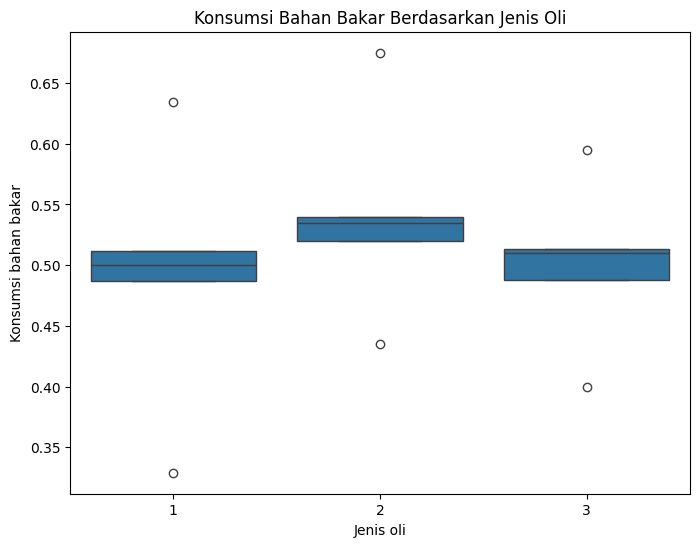

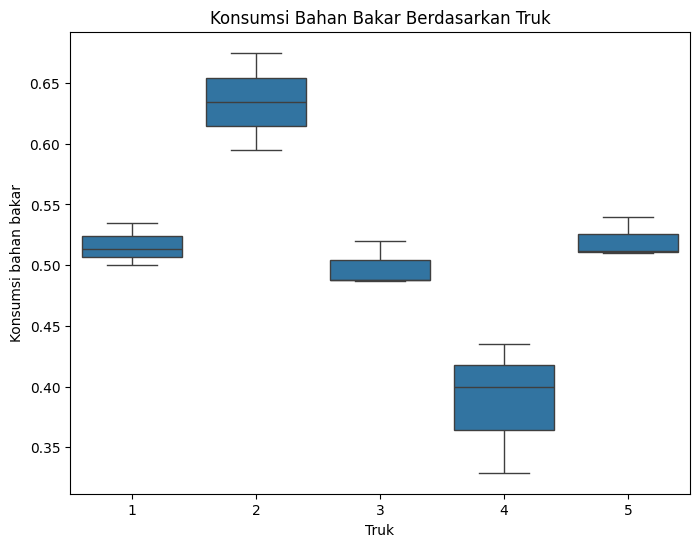

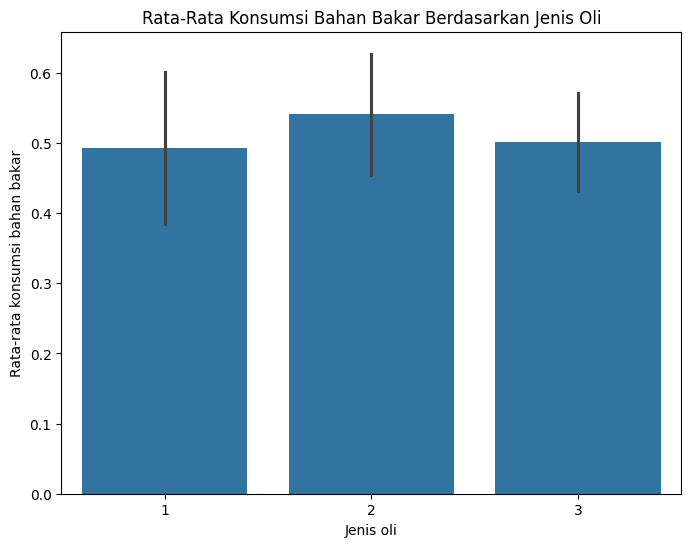

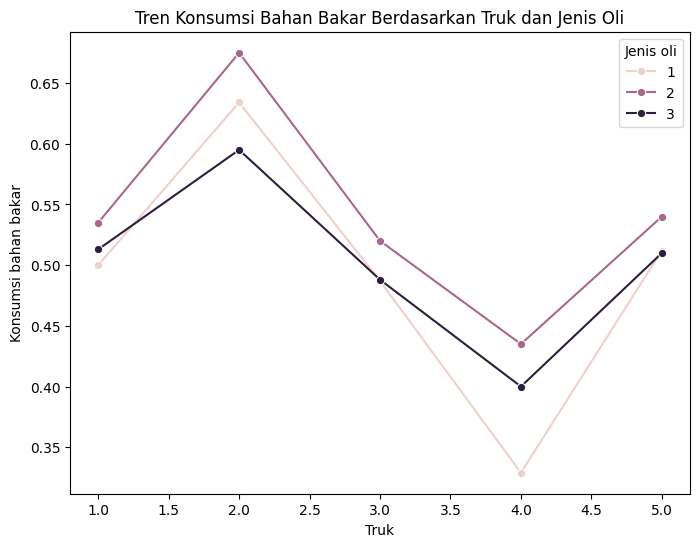

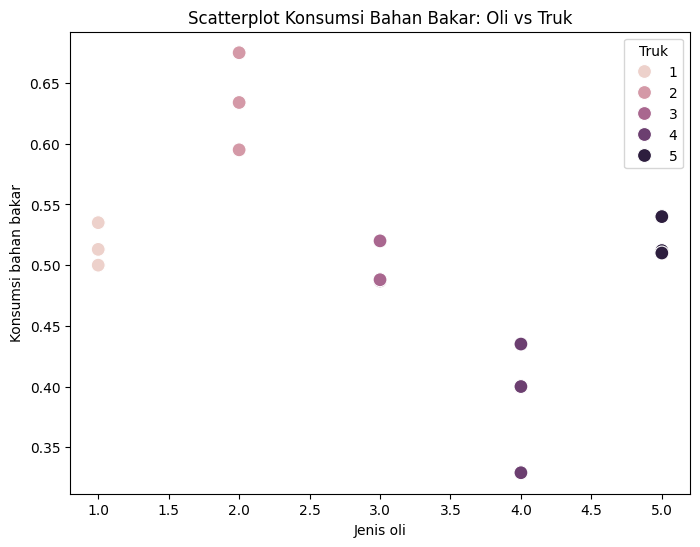

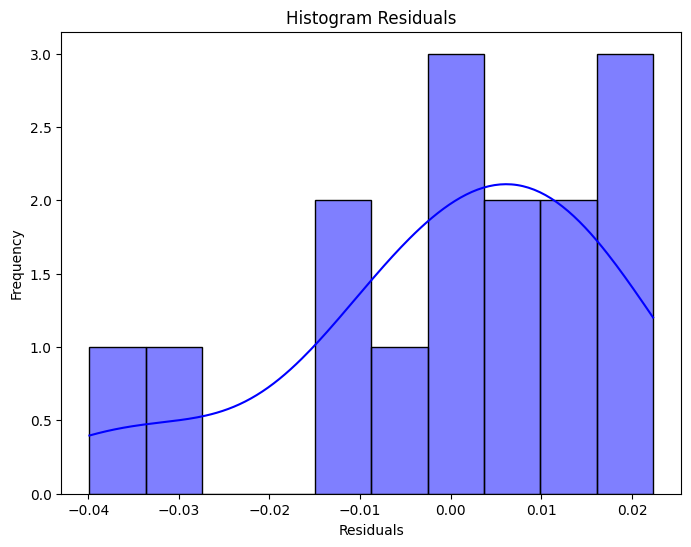

<Figure size 800x600 with 0 Axes>

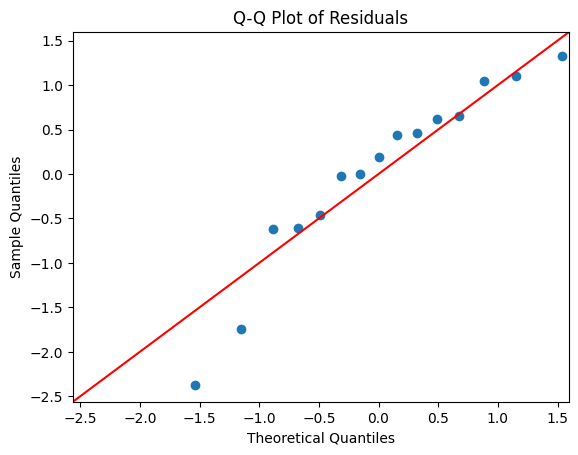

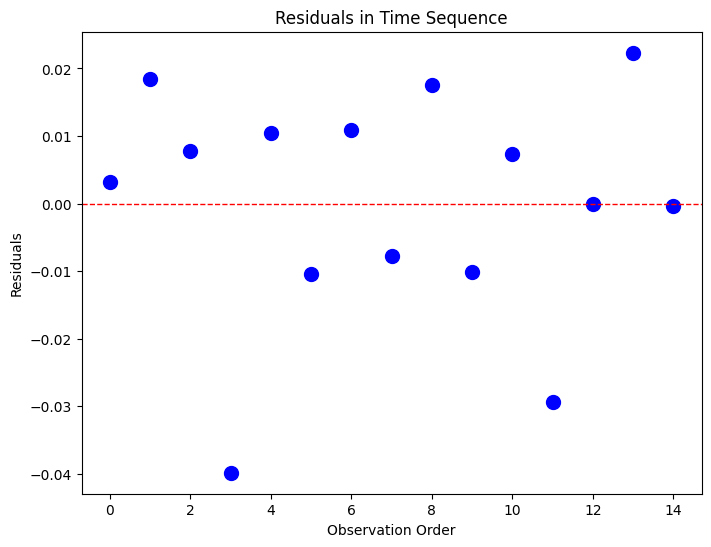


Tabel ANOVA:

Tabel ANOVA dengan Total:


,Sum of Squares,Degrees of Freedom,Mean Square,F-value,P-value,F-critical
Treatment (Oli),0.006706,2.0,0.003353,6.352733,0.022285,4.458970
Block (Truk),0.092100,4.0,0.023025,43.625730,0.000018,3.837853
Error,0.004222,8.0,0.000528,NaN,NaN,3.438101
Total,0.103028,14.0,0.007359,NaN,NaN,NaN


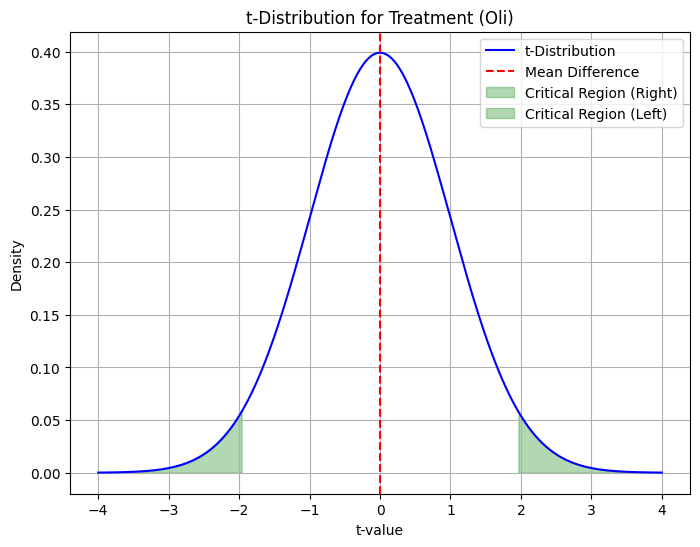

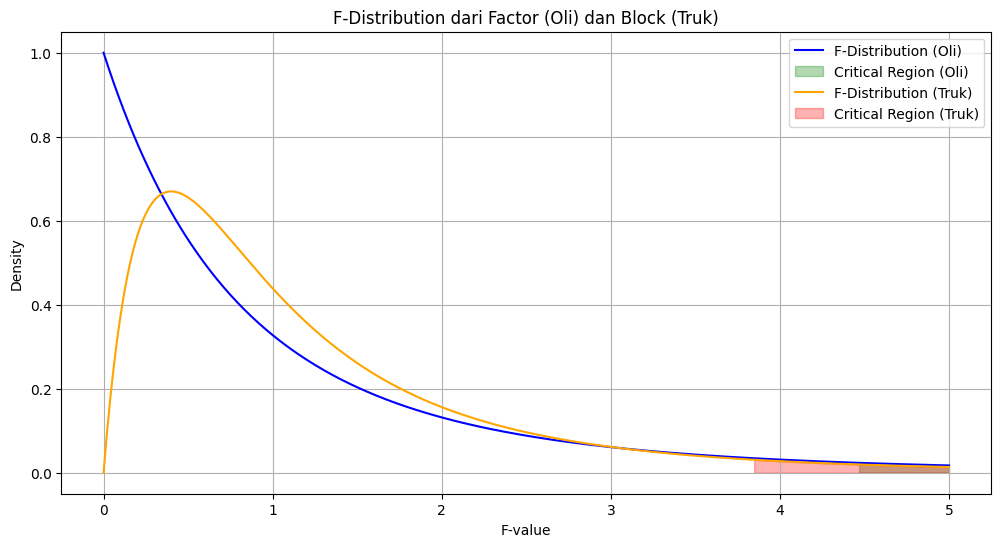

In [8]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate
from statsmodels.formula.api import ols
from scipy.stats import f

# Menampilkan tabel menggunakan tabulate
print("Tabel data konsumsi bahan bakar:")
tabel = [
    ["Oli (Treatment)", "Truk 1", "Truk 2", "Truk 3", "Truk 4", "Truk 5"],
    [1, 0.500, 0.634, 0.487, 0.329, 0.512],
    [2, 0.535, 0.675, 0.520, 0.435, 0.540],
    [3, 0.513, 0.595, 0.488, 0.400, 0.510]
]

#print(tabulate(tabel, headers="firstrow", tablefmt="grid"))
df = pd.DataFrame(tabel[1:], columns=tabel[0])

# Menghitung rata-rata dan jumlah tiap treatment
df['Rata-rata'] = df.iloc[:, 1:].mean(axis=1)
df['Jumlah'] = df.iloc[:, 1:].sum(axis=1)

# Menghitung rata-rata dan total untuk tiap truk
truk_means = df.iloc[:, 1:-2].mean(axis=0)
truk_totals = df.iloc[:, 1:-2].sum(axis=0)

# Menambahkan rata-rata dan total sebagai baris baru
df.loc['Rata-rata Truk'] = ['Rata-rata'] + truk_means.tolist() + [truk_means.mean(), truk_means.sum()]
df.loc['Total Truk'] = ['Jumlah'] + truk_totals.tolist() + [truk_totals.mean(), truk_totals.sum()]

# Menampilkan tabel dengan rata-rata dan jumlah
display(df.style.hide(axis="index"))

# Menampilkan deskripsi data
print("\nDeskripsi statistik data konsumsi bahan bakar:")
# Menampilkan deskripsi statistik data konsumsi bahan bakar tanpa baris rata-rata dan jumlah
display(df.iloc[:-2, :-2].describe())

print("\nMengurutkan data untuk memudahkan perhitungan ANOVA:") 
data = {
    'Oli': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
    'Truk': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Konsumsi_Bahan_Bakar': [0.500, 0.634, 0.487, 0.329, 0.512, 0.535, 0.675, 0.520, 0.435, 0.540, 0.513, 0.595, 0.488, 0.400, 0.510]
}

df = pd.DataFrame(data)
display(df.style.hide(axis="index"))

# Boxplot untuk Oli
plt.figure(figsize=(8, 6))
sns.boxplot(x='Oli', y='Konsumsi_Bahan_Bakar', data=df)
plt.title('Konsumsi Bahan Bakar Berdasarkan Jenis Oli')
plt.xlabel('Jenis oli')
plt.ylabel('Konsumsi bahan bakar')
plt.show()

# Boxplot untuk Truk
plt.figure(figsize=(8, 6))
sns.boxplot(x='Truk', y='Konsumsi_Bahan_Bakar', data=df)
plt.title('Konsumsi Bahan Bakar Berdasarkan Truk')
plt.xlabel('Truk')
plt.ylabel('Konsumsi bahan bakar')
plt.show()

# Barplot untuk rata-rata konsumsi bahan bakar berdasarkan Oil
plt.figure(figsize=(8, 6))
sns.barplot(x='Oli', y='Konsumsi_Bahan_Bakar', data=df, estimator='mean', errorbar='sd')
plt.title('Rata-Rata Konsumsi Bahan Bakar Berdasarkan Jenis Oli')
plt.xlabel('Jenis oli')
plt.ylabel('Rata-rata konsumsi bahan bakar')
plt.show()

# Lineplot untuk tren konsumsi bahan bakar
plt.figure(figsize=(8, 6))
sns.lineplot(x='Truk', y='Konsumsi_Bahan_Bakar', hue='Oli', data=df, marker='o')
plt.title('Tren Konsumsi Bahan Bakar Berdasarkan Truk dan Jenis Oli')
plt.xlabel('Truk')
plt.ylabel('Konsumsi bahan bakar')
plt.legend(title='Jenis oli')
plt.show()

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Truk', y='Konsumsi_Bahan_Bakar', hue='Truk', data=df, s=100)
plt.title('Scatterplot Konsumsi Bahan Bakar: Oli vs Truk')
plt.xlabel('Jenis oli')
plt.ylabel('Konsumsi bahan bakar')
plt.legend(title='Truk')
plt.show()

# Membuat model ANOVA
model = ols('Konsumsi_Bahan_Bakar ~ C(Oli) + C(Truk)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table.index = ['Treatment (Oli)', 'Block (Truk)', 'Error']

# Periksa asumsi normalitas dari kesalahan residual
residuals = model.resid

# Plot histogram residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=10, color='blue')
plt.title('Histogram Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot residuals in time sequence
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', s=100)
plt.title('Residuals in Time Sequence')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

# Mengganti nama kolom
anova_table_renamed = anova_table.rename(columns={
    'sum_sq': 'Sum of Squares',
    'df': 'Degrees of Freedom',
    'F': 'F-value',
    'PR(>F)': 'P-value'
})

# Menambahkan kolom Mean Square
anova_table_renamed['Mean Square'] = anova_table_renamed['Sum of Squares'] / anova_table_renamed['Degrees of Freedom']

# Menghitung F-critical
alpha = 0.05  # Tingkat signifikansi
anova_table_renamed['F-critical'] = f.ppf(1 - alpha, anova_table_renamed['Degrees of Freedom'], anova_table_renamed.loc['Error', 'Degrees of Freedom'])

new_column_order = ['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F-value', 'P-value', 'F-critical']
anova_table_reordered = anova_table_renamed[new_column_order]

print("\nTabel ANOVA:")
# display(anova_table_reordered)
# print(tabulate(anova_table_reordered, headers='keys', tablefmt='grid'))

# Menghitung Total Sum of Squares, Degrees of Freedom, dan Mean Square
total_sum_sq = anova_table_renamed['Sum of Squares'].sum()
total_df = anova_table_renamed['Degrees of Freedom'].sum()
total_mean_sq = total_sum_sq / total_df

# Membuat baris Total
import numpy as np
from scipy.stats import norm

total_row = pd.DataFrame({
    'Sum of Squares': [total_sum_sq],
    'Degrees of Freedom': [total_df],
    'Mean Square': [total_mean_sq],
    'F-value': [np.nan],
    'P-value': [np.nan],
    'F-critical': [np.nan]
}, index=['Total'])

# Menggabungkan baris Total ke tabel ANOVA
anova_table_with_total = pd.concat([anova_table_reordered, total_row])

print("\nTabel ANOVA dengan Total:")
display(anova_table_with_total)

# Plot the Probability Density Function (PDF) for t-distribution of Treatment (Oli)
plt.figure(figsize=(8, 6))

# Generate x-axis values for the t-distribution
x_t = np.linspace(-4, 4, 500)

# Calculate the t-distribution PDF
df_treatment = anova_table_renamed.loc['Treatment (Oli)', 'Degrees of Freedom']
t_pdf = norm.pdf(x_t, loc=0, scale=1)  # Assuming standard normal distribution for simplicity

# Plot the t-distribution
plt.plot(x_t, t_pdf, label='t-Distribution', color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Mean Difference')
plt.fill_between(x_t, t_pdf, where=(x_t >= 1.96), color='green', alpha=0.3, label='Critical Region (Right)')
plt.fill_between(x_t, t_pdf, where=(x_t <= -1.96), color='green', alpha=0.3, label='Critical Region (Left)')
plt.title('t-Distribution for Treatment (Oli)')
plt.xlabel('t-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot the F-distribution for the "Oli" treatment and "Truk" block
plt.figure(figsize=(12, 6))

# Degrees of freedom for the numerator and denominator for "Oli" treatment
dfn_oli = anova_table_renamed.loc['Treatment (Oli)', 'Degrees of Freedom']
dfd_oli = anova_table_renamed.loc['Error', 'Degrees of Freedom']

# Degrees of freedom for the numerator and denominator for "Truk" block
dfn_truk = anova_table_renamed.loc['Block (Truk)', 'Degrees of Freedom']
dfd_truk = anova_table_renamed.loc['Error', 'Degrees of Freedom']

# Generate x-axis values for the F-distribution
x = np.linspace(0, 5, 500)

# Calculate the F-distribution PDF for "Oli" treatment
f_pdf_oli = f.pdf(x, dfn_oli, dfd_oli)

# Calculate the F-distribution PDF for "Truk" block
f_pdf_truk = f.pdf(x, dfn_truk, dfd_truk)

# Plot the F-distribution for "Oli" treatment
plt.plot(x, f_pdf_oli, label='F-Distribution (Oli)', color='blue')
plt.fill_between(x, f_pdf_oli, where=(x >= anova_table_renamed.loc['Treatment (Oli)', 'F-critical']), 
                 color='green', alpha=0.3, label='Critical Region (Oli)')

# Plot the F-distribution for "Truk" block
plt.plot(x, f_pdf_truk, label='F-Distribution (Truk)', color='orange')
plt.fill_between(x, f_pdf_truk, where=(x >= anova_table_renamed.loc['Block (Truk)', 'F-critical']), 
                 color='red', alpha=0.3, label='Critical Region (Truk)')

# Add titles and labels
plt.title('F-Distribution dari Factor (Oli) dan Block (Truk)')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Tabel 1: Feed Rate = 0.20


,Feed Rate,Depth of Cut,Surface Finish
0,0.2,0.15,74
1,0.2,0.15,64
2,0.2,0.15,60
3,0.2,0.18,79
4,0.2,0.18,68
5,0.2,0.18,73
6,0.2,0.20,82
7,0.2,0.20,88
8,0.2,0.20,92
9,0.2,0.25,99



Tabel 2: Feed Rate = 0.25


,Feed Rate,Depth of Cut,Surface Finish
12,0.25,0.15,92
13,0.25,0.15,86
14,0.25,0.15,88
15,0.25,0.18,98
16,0.25,0.18,104
17,0.25,0.18,88
18,0.25,0.20,99
19,0.25,0.20,108
20,0.25,0.20,95
21,0.25,0.25,104



Tabel 2: Feed Rate = 0.30


,Feed Rate,Depth of Cut,Surface Finish
24,0.3,0.15,99
25,0.3,0.15,98
26,0.3,0.15,102
27,0.3,0.18,104
28,0.3,0.18,99
29,0.3,0.18,95
30,0.3,0.20,108
31,0.3,0.20,110
32,0.3,0.20,99
33,0.3,0.25,114


,Feed Rate,Depth of Cut,Surface Finish
count,36.000000,36.000000,36.000000
mean,0.250000,0.195000,94.333333
std,0.041404,0.036917,13.661207
min,0.200000,0.150000,60.000000
25%,0.200000,0.172500,88.000000
50%,0.250000,0.190000,98.500000
75%,0.300000,0.212500,104.000000
max,0.300000,0.250000,114.000000


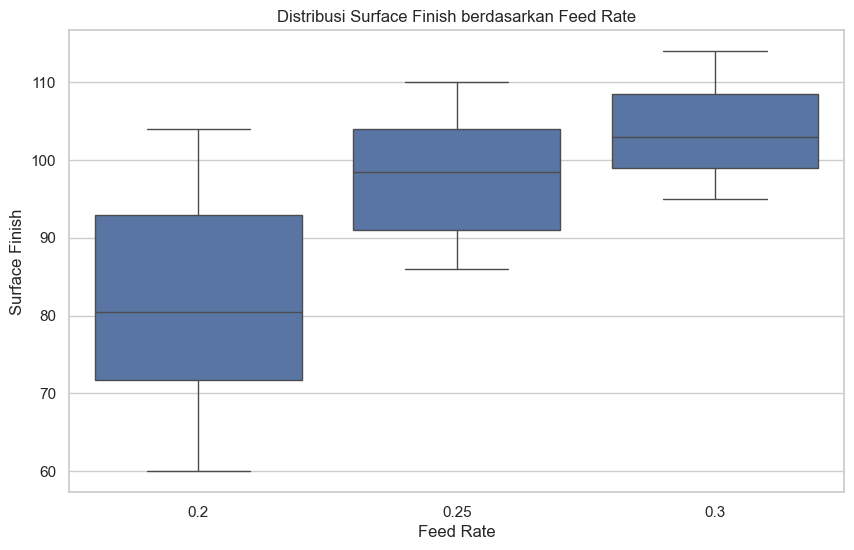

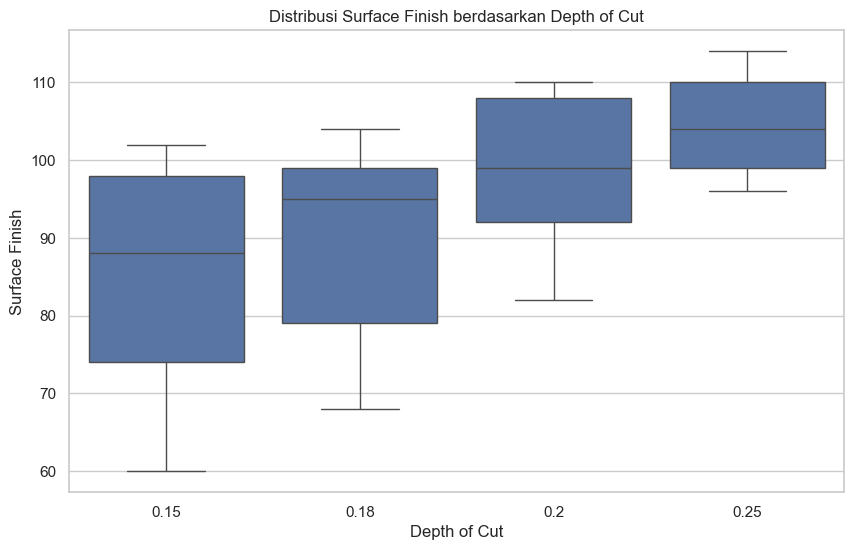

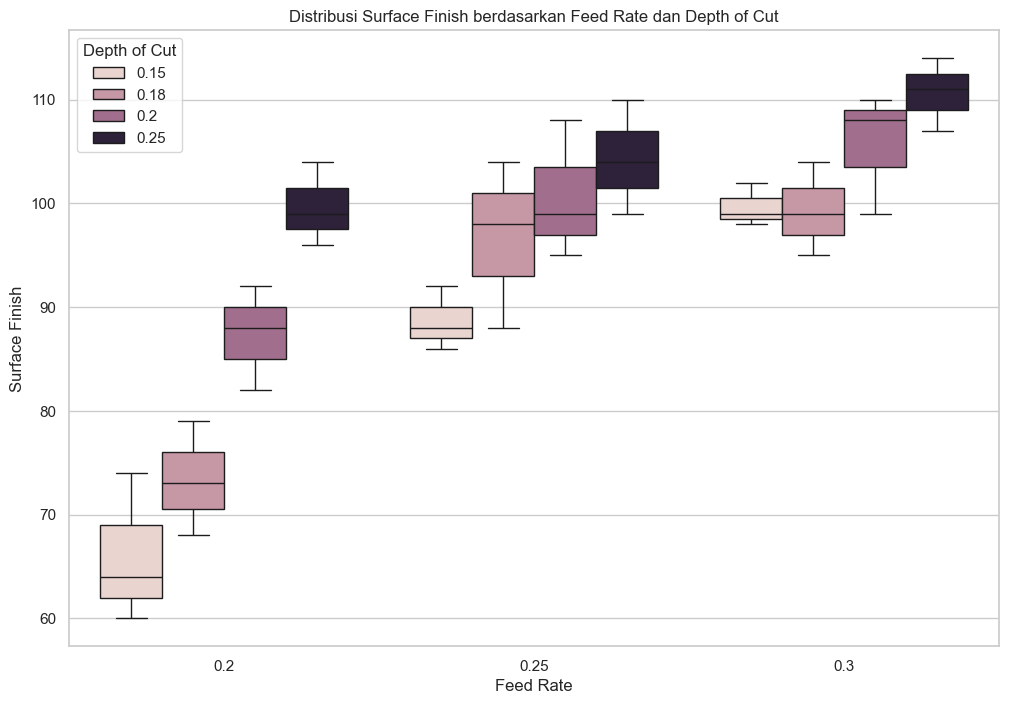

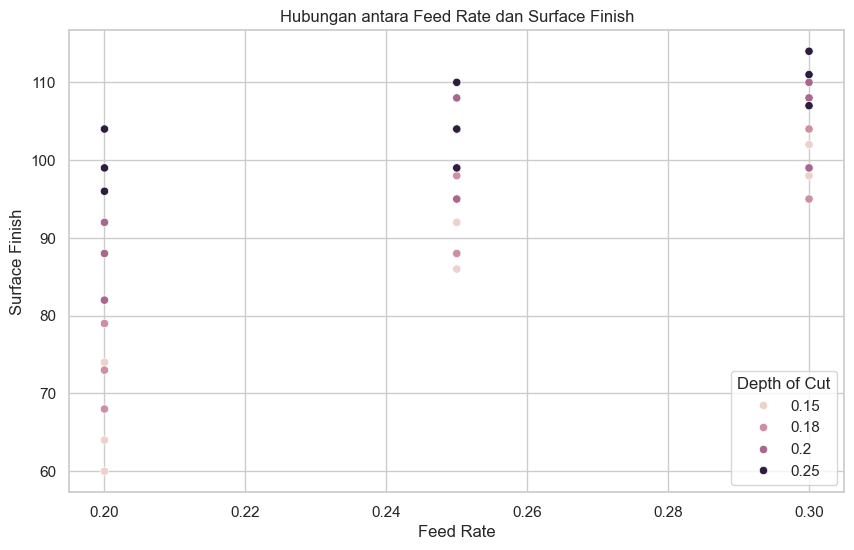

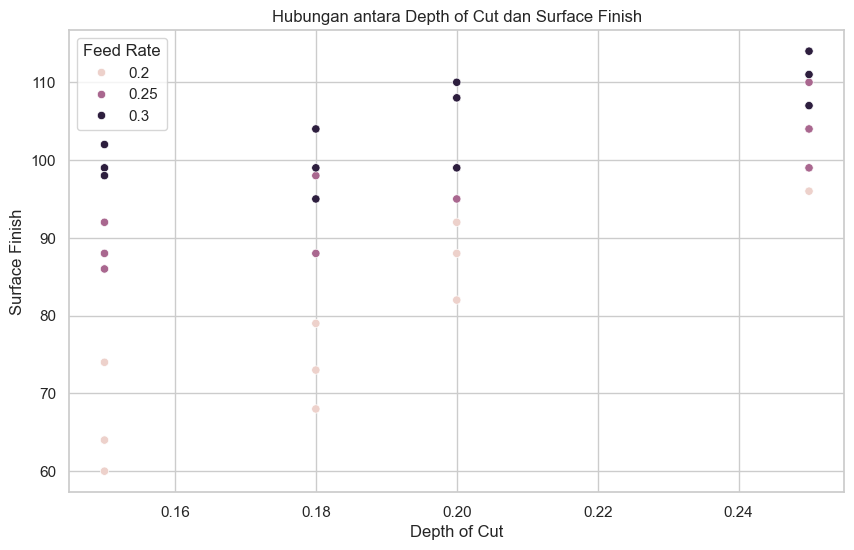

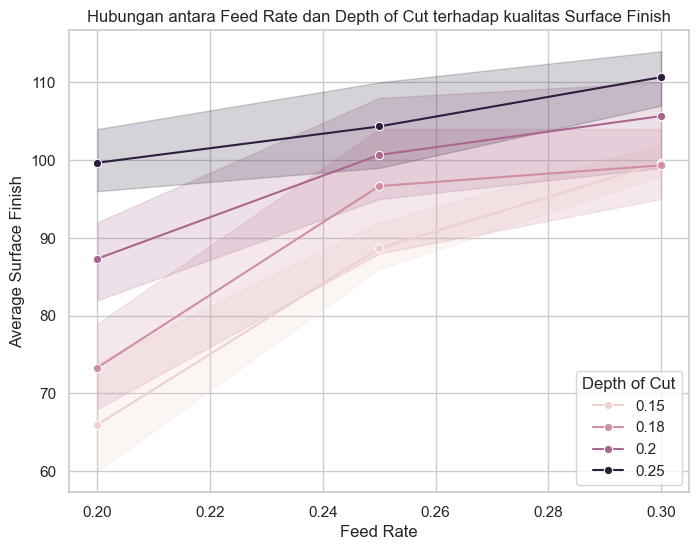

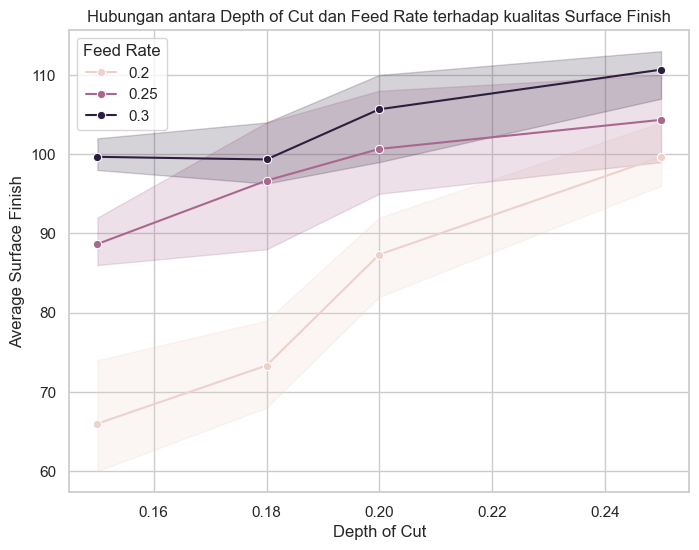

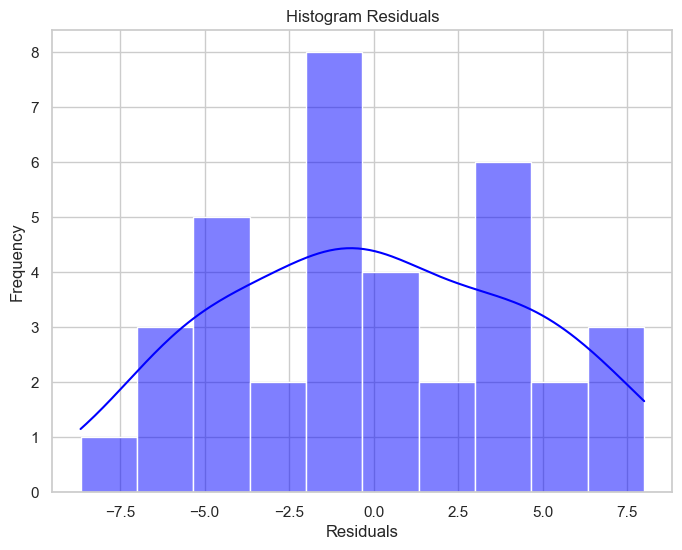

<Figure size 800x600 with 0 Axes>

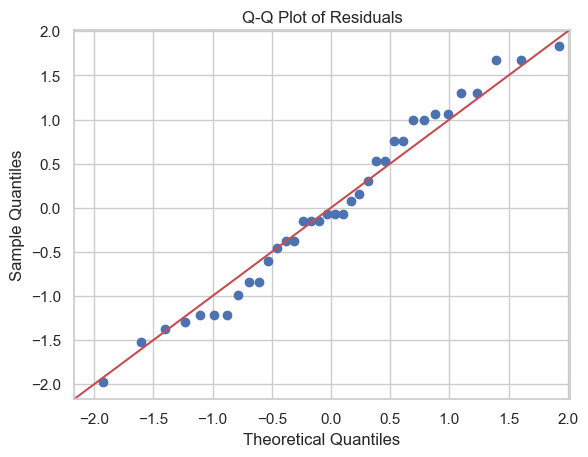

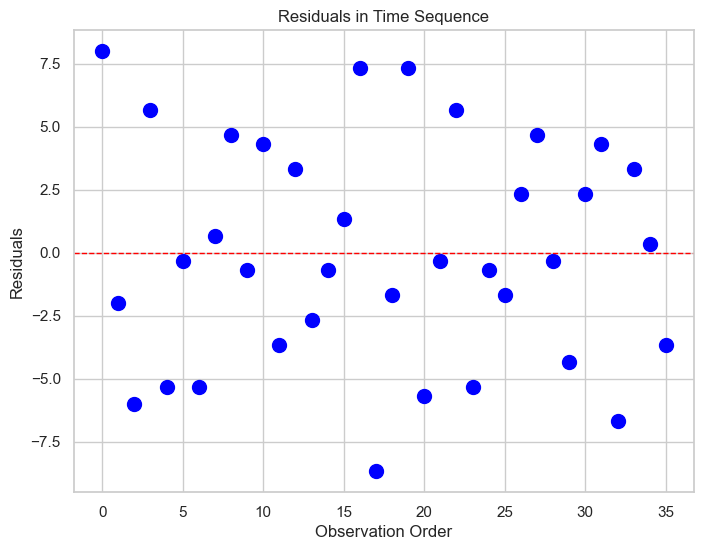

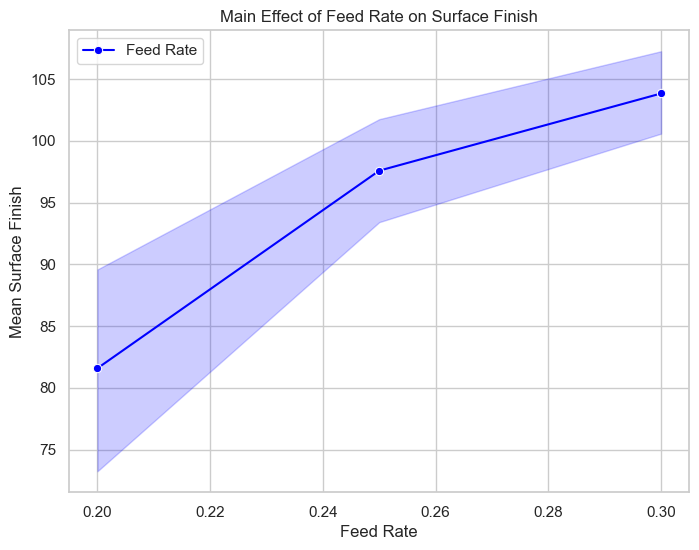

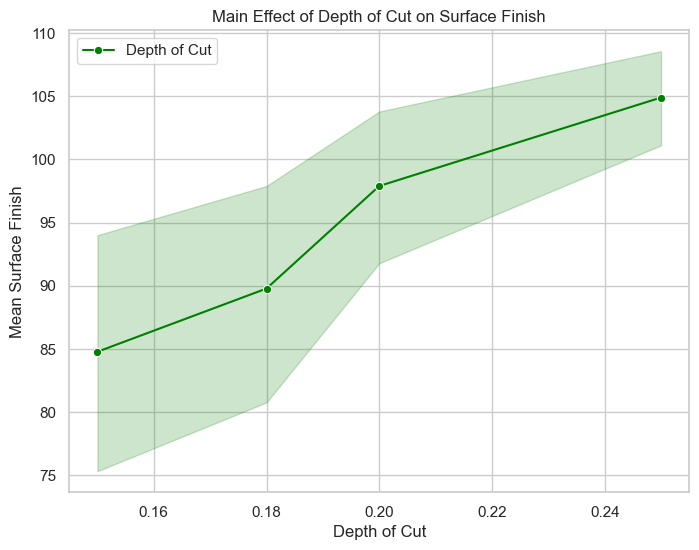

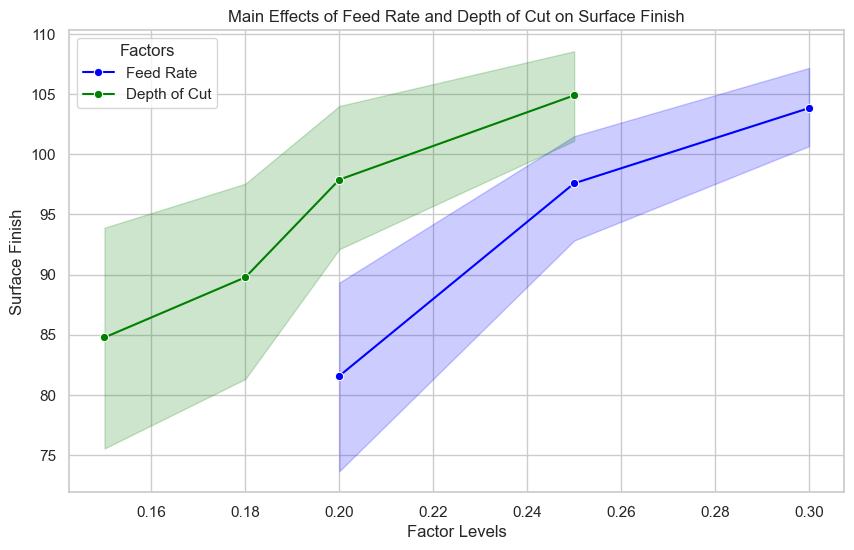

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f

# Persiapan data
data = [
    # Feed Rate: 0.20
    {"Feed Rate": 0.20, "Depth of Cut": 0.15, "Surface Finish": 74},
    {"Feed Rate": 0.20, "Depth of Cut": 0.15, "Surface Finish": 64},
    {"Feed Rate": 0.20, "Depth of Cut": 0.15, "Surface Finish": 60},
    
    {"Feed Rate": 0.20, "Depth of Cut": 0.18, "Surface Finish": 79},
    {"Feed Rate": 0.20, "Depth of Cut": 0.18, "Surface Finish": 68},
    {"Feed Rate": 0.20, "Depth of Cut": 0.18, "Surface Finish": 73},
    
    {"Feed Rate": 0.20, "Depth of Cut": 0.20, "Surface Finish": 82},
    {"Feed Rate": 0.20, "Depth of Cut": 0.20, "Surface Finish": 88},
    {"Feed Rate": 0.20, "Depth of Cut": 0.20, "Surface Finish": 92},
    
    {"Feed Rate": 0.20, "Depth of Cut": 0.25, "Surface Finish": 99},
    {"Feed Rate": 0.20, "Depth of Cut": 0.25, "Surface Finish": 104},
    {"Feed Rate": 0.20, "Depth of Cut": 0.25, "Surface Finish": 96},
    
    # Feed Rate: 0.25
    {"Feed Rate": 0.25, "Depth of Cut": 0.15, "Surface Finish": 92},
    {"Feed Rate": 0.25, "Depth of Cut": 0.15, "Surface Finish": 86},
    {"Feed Rate": 0.25, "Depth of Cut": 0.15, "Surface Finish": 88},
    
    {"Feed Rate": 0.25, "Depth of Cut": 0.18, "Surface Finish": 98},
    {"Feed Rate": 0.25, "Depth of Cut": 0.18, "Surface Finish": 104},
    {"Feed Rate": 0.25, "Depth of Cut": 0.18, "Surface Finish": 88},
    
    {"Feed Rate": 0.25, "Depth of Cut": 0.20, "Surface Finish": 99},
    {"Feed Rate": 0.25, "Depth of Cut": 0.20, "Surface Finish": 108},
    {"Feed Rate": 0.25, "Depth of Cut": 0.20, "Surface Finish": 95},
    
    {"Feed Rate": 0.25, "Depth of Cut": 0.25, "Surface Finish": 104},
    {"Feed Rate": 0.25, "Depth of Cut": 0.25, "Surface Finish": 110},
    {"Feed Rate": 0.25, "Depth of Cut": 0.25, "Surface Finish": 99},
    
    # Feed Rate: 0.30
    {"Feed Rate": 0.30, "Depth of Cut": 0.15, "Surface Finish": 99},
    {"Feed Rate": 0.30, "Depth of Cut": 0.15, "Surface Finish": 98},
    {"Feed Rate": 0.30, "Depth of Cut": 0.15, "Surface Finish": 102},
    
    {"Feed Rate": 0.30, "Depth of Cut": 0.18, "Surface Finish": 104},
    {"Feed Rate": 0.30, "Depth of Cut": 0.18, "Surface Finish": 99},
    {"Feed Rate": 0.30, "Depth of Cut": 0.18, "Surface Finish": 95},
    
    {"Feed Rate": 0.30, "Depth of Cut": 0.20, "Surface Finish": 108},
    {"Feed Rate": 0.30, "Depth of Cut": 0.20, "Surface Finish": 110},
    {"Feed Rate": 0.30, "Depth of Cut": 0.20, "Surface Finish": 99},
    
    {"Feed Rate": 0.30, "Depth of Cut": 0.25, "Surface Finish": 114},
    {"Feed Rate": 0.30, "Depth of Cut": 0.25, "Surface Finish": 111},
    {"Feed Rate": 0.30, "Depth of Cut": 0.25, "Surface Finish": 107},
]

# Membuat DataFrame
df = pd.DataFrame(data)

# Memisahkan data berdasarkan Feed Rate
df_feed_rate_020 = df[df['Feed Rate'] == 0.20]
df_feed_rate_025 = df[df['Feed Rate'] == 0.25]
df_feed_rate_030 = df[df['Feed Rate'] == 0.30]

# Menampilkan 2 tabel terpisah
print("Tabel 1: Feed Rate = 0.20")
display(df_feed_rate_020)

print("\nTabel 2: Feed Rate = 0.25")
display(df_feed_rate_025)

print("\nTabel 2: Feed Rate = 0.30")
display(df_feed_rate_030)

display(df.describe())

# Set style untuk seaborn
sns.set(style="whitegrid")

# Boxplot untuk Surface Finish berdasarkan Feed Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feed Rate', y='Surface Finish', data=df)
plt.title('Distribusi Surface Finish berdasarkan Feed Rate')
plt.show()

# Boxplot untuk Surface Finish berdasarkan Depth of Cut
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depth of Cut', y='Surface Finish', data=df)
plt.title('Distribusi Surface Finish berdasarkan Depth of Cut')
plt.show()

# Boxplot untuk Surface Finish berdasarkan kombinasi Feed Rate dan Depth of Cut
plt.figure(figsize=(12, 8))
sns.boxplot(x='Feed Rate', y='Surface Finish', hue='Depth of Cut', data=df)
plt.title('Distribusi Surface Finish berdasarkan Feed Rate dan Depth of Cut')
plt.show()

# Scatter plot untuk Feed Rate vs Surface Finish
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feed Rate', y='Surface Finish', hue='Depth of Cut', data=df)
plt.title('Hubungan antara Feed Rate dan Surface Finish')
plt.show()

# Scatter plot untuk Depth of Cut vs Surface Finish
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth of Cut', y='Surface Finish', hue='Feed Rate', data=df)
plt.title('Hubungan antara Depth of Cut dan Surface Finish')
plt.show()

# Lineplot untuk tren Feed Rate dan Surface Finish
plt.figure(figsize=(8, 6))
sns.lineplot(x='Feed Rate', y='Surface Finish', hue='Depth of Cut', data=df, marker='o')
plt.title('Hubungan antara Feed Rate dan Depth of Cut terhadap kualitas Surface Finish')
plt.xlabel('Feed Rate')
plt.ylabel('Average Surface Finish')
plt.legend(title='Depth of Cut')
plt.show()

# Lineplot untuk tren antara Depth of Cut dan Surface Finish
plt.figure(figsize=(8, 6))
sns.lineplot(x='Depth of Cut', y='Surface Finish', hue='Feed Rate', data=df, marker='o')
plt.title('Hubungan antara Depth of Cut dan Feed Rate terhadap kualitas Surface Finish')
plt.xlabel('Depth of Cut')
plt.ylabel('Average Surface Finish')
plt.legend(title='Feed Rate')
plt.show()

# Fit the model
model = ols('Q("Surface Finish") ~ C(Q("Feed Rate")) + C(Q("Depth of Cut")) + C(Q("Feed Rate")):C(Q("Depth of Cut"))', data=df).fit()

# Periksa asumsi normalitas dari kesalahan residual
residuals = model.resid

# Plot histogram residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=10, color='blue')
plt.title('Histogram Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot residuals in time sequence
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', s=100)
plt.title('Residuals in Time Sequence')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

# Main Effects Plot for Feed Rate
plt.figure(figsize=(8, 6))
sns.lineplot(x='Feed Rate', y='Surface Finish', data=df, marker='o', label='Feed Rate', color='blue')
plt.title('Main Effect of Feed Rate on Surface Finish')
plt.xlabel('Feed Rate')
plt.ylabel('Mean Surface Finish')
plt.grid(True)
plt.show()

# Main Effects Plot for Depth of Cut
plt.figure(figsize=(8, 6))
sns.lineplot(x='Depth of Cut', y='Surface Finish', data=df, marker='o', label='Depth of Cut', color='green')
plt.title('Main Effect of Depth of Cut on Surface Finish')
plt.xlabel('Depth of Cut')
plt.ylabel('Mean Surface Finish')
plt.grid(True)
plt.show()

# Lineplot for Main Effects of Feed Rate and Depth of Cut
plt.figure(figsize=(10, 6))

# Main effect of Feed Rate
sns.lineplot(x='Feed Rate', y='Surface Finish', data=df, marker='o', label='Feed Rate', color='blue')

# Main effect of Depth of Cut
sns.lineplot(x='Depth of Cut', y='Surface Finish', data=df, marker='o', label='Depth of Cut', color='green')

plt.title('Main Effects of Feed Rate and Depth of Cut on Surface Finish')
plt.xlabel('Factor Levels')
plt.ylabel('Surface Finish')
plt.legend(title='Factors')
plt.grid(True)
plt.show()